In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier

In [19]:
data = pd.read_csv('./data.csv') # Goodbye numpy for csv reading and hello pandas
header_row = data.columns.values
category_vals = data.columns.values[:header_row.shape[0]-1]

df = pd.get_dummies(data=data,prefix = category_vals,columns=category_vals)

target_feature = "Is_Cat"
features = [x for x in df.columns if x not in target_feature]

X_train,X_val,y_train,y_val = train_test_split(df[features],df[target_feature],test_size=0.8,random_state=1)

print(f'train samples: {len(X_train)}')
print(f'validation samples: {len(X_val)}')
print(f'target proportion: {sum(y_train)/len(y_train):.4f}')

train samples: 10
validation samples: 40
target proportion: 0.5000


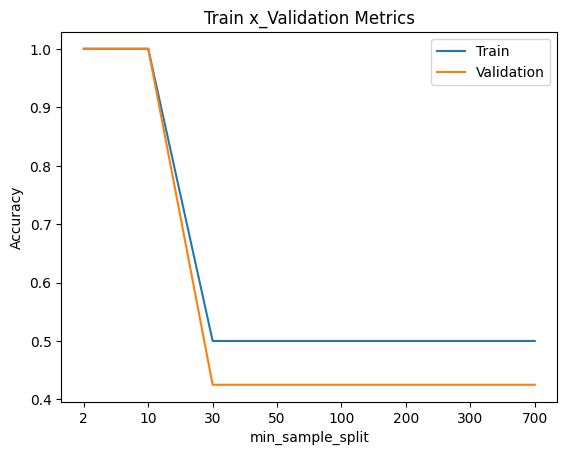

In [20]:
# Training a Decision Tree and testing hyperparameters split size and max depth
# Training v1 with only min_samples_split as hyperparameter
min_samples_split_list = [2,10, 30, 50, 100, 200, 300, 700] 
max_depth_list = [1,2, 3, 4, 8, 16, 32, 64, None] 

accuracy_list_train = []
accuracy_list_val = []

for min_sample_split in min_samples_split_list:
    model = DecisionTreeClassifier(min_samples_split=min_sample_split)
    model.fit(X_train,y_train)
    
    predictions_train = model.predict(X_train)
    predictions_val = model.predict(X_val)
    accuracy_train = accuracy_score(y_train,predictions_train)
    accuracy_val = accuracy_score(y_val,predictions_val)
    
    accuracy_list_train.append(accuracy_train)
    accuracy_list_val.append(accuracy_val)
    
plt.title("Train x_Validation Metrics")
plt.xlabel("min_sample_split")
plt.ylabel("Accuracy")
plt.xticks(ticks = range(len(min_samples_split_list )),labels=min_samples_split_list)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_val)
plt.legend(["Train","Validation"])

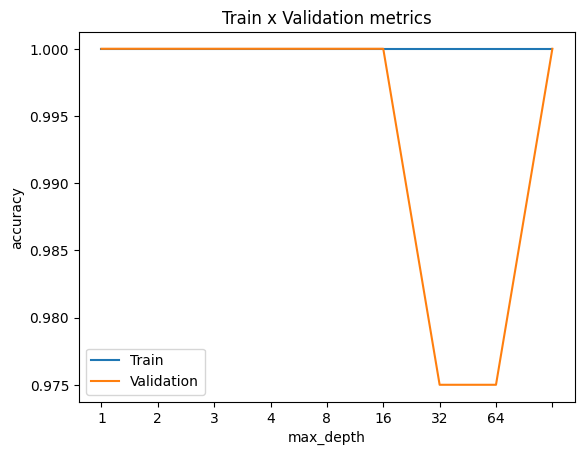

In [21]:
# Training v2 with only max_depth_list as hyperparameter
min_samples_split_list = [2,10, 30, 50, 100, 200, 300, 700] 
max_depth_list = [1,2, 3, 4, 8, 16, 32, 64, None] 

accuracy_list_train = []
accuracy_list_val = []

for max_depth in max_depth_list:
    model = DecisionTreeClassifier(max_depth=max_depth)
    model.fit(X_train,y_train)
    
    predictions_train = model.predict(X_train)
    predictions_val = model.predict(X_val)
    accuracy_train = accuracy_score(y_train,predictions_train)
    accuracy_val = accuracy_score(y_val,predictions_val)
    
    accuracy_list_train.append(accuracy_train)
    accuracy_list_val.append(accuracy_val)
    
plt.title('Train x Validation metrics')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(max_depth_list )),labels=max_depth_list)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_val)
plt.legend(['Train','Validation'])


In [22]:
decision_tree_model = DecisionTreeClassifier(min_samples_split = 50,
                                             max_depth = 3,
                                             ).fit(X_train,y_train)
print(f"Metrics train:\n\tAccuracy score: {accuracy_score(decision_tree_model.predict(X_train),y_train):.4f}")
print(f"Metrics validation:\n\tAccuracy score: {accuracy_score(decision_tree_model.predict(X_val),y_val):.4f}")

Metrics train:
	Accuracy score: 0.5000
Metrics validation:
	Accuracy score: 0.4250


In [23]:
decision_tree_model = DecisionTreeClassifier(
                                             min_samples_split = 2,
                                             max_depth = 4,
                                             ).fit(X_train,y_train)
print(f"Metrics train:\n\tAccuracy score: {accuracy_score(decision_tree_model.predict(X_train),y_train):.4f}")
print(f"Metrics validation:\n\tAccuracy score: {accuracy_score(decision_tree_model.predict(X_val),y_val):.4f}")
# This model seems to generalize the data really well compared to the first one which has too many splits, to which I believe
# causes high bias and low variance. This model has a good balance between bias and variance.

Metrics train:
	Accuracy score: 1.0000
Metrics validation:
	Accuracy score: 0.9750


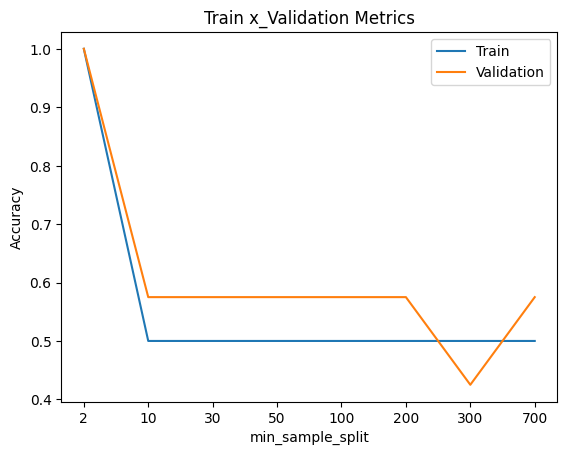

In [24]:
# Random Forest
# Testing hyperparameters min_samples_split, max_depth and n_estimators

min_samples_split_list = [2,10, 30, 50, 100, 200, 300, 700]
max_depth_list = [2, 4, 8, 16, 32, 64, None]
n_estimators_list = [10,50,100,500] # This new hyperparameter is the number of trees in the forest
accuracy_list_train = []
accuracy_list_val = []
for min_sample_split in min_samples_split_list:
    model = RandomForestClassifier(min_samples_split=min_sample_split,n_jobs=-1)
    model.fit(X_train,y_train)
    
    predictions_train = model.predict(X_train)
    predictions_val = model.predict(X_val)
    accuracy_train = accuracy_score(y_train,predictions_train)
    accuracy_val = accuracy_score(y_val,predictions_val)
    
    accuracy_list_train.append(accuracy_train)
    accuracy_list_val.append(accuracy_val)
    
plt.title("Train x_Validation Metrics")
plt.xlabel("min_sample_split")
plt.ylabel("Accuracy")
plt.xticks(ticks = range(len(min_samples_split_list )),labels=min_samples_split_list)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_val)
plt.legend(["Train","Validation"])

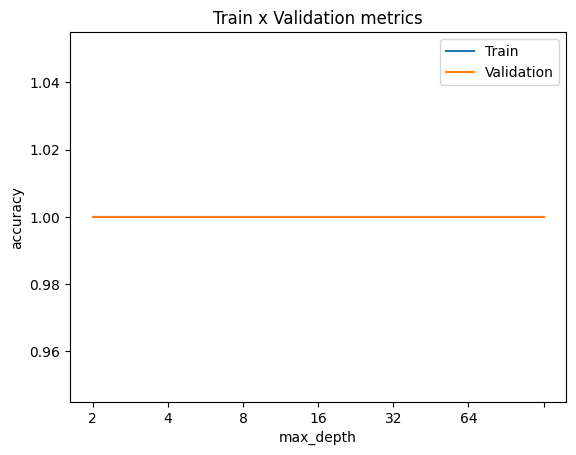

In [25]:
accuracy_list_train = []
accuracy_list_val = []
for max_depth in max_depth_list:
    model = RandomForestClassifier(max_depth = max_depth,n_jobs=-1).fit(X_train,y_train) 
    predictions_train = model.predict(X_train) 
    predictions_val = model.predict(X_val)
    accuracy_train = accuracy_score(predictions_train,y_train)
    accuracy_val = accuracy_score(predictions_val,y_val)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_val.append(accuracy_val)

plt.title('Train x Validation metrics')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(max_depth_list )),labels=max_depth_list)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_val)
plt.legend(['Train','Validation'])

# For some reason in this data, the max_depth hyperparameter didn't do anything but set the accuracy at 100% but other datas
# I've found dont show this kind of pattern. I believe this is because the data is too simple and the model can easily fit it

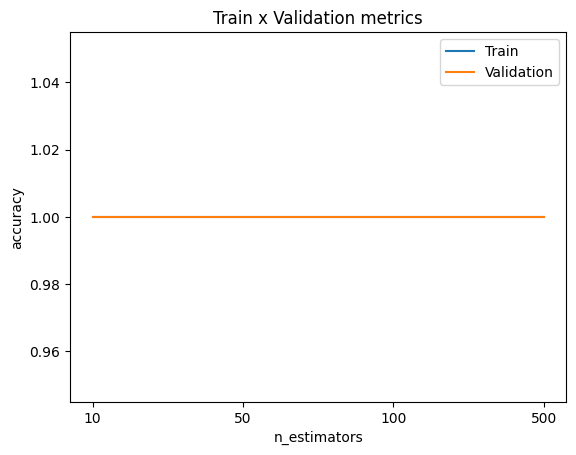

In [26]:
accuracy_list_train = []
accuracy_list_val = []
for n_estimators in n_estimators_list:
    model = RandomForestClassifier(n_estimators = n_estimators,n_jobs=-1).fit(X_train,y_train) 
    predictions_train = model.predict(X_train)
    predictions_val = model.predict(X_val)
    accuracy_train = accuracy_score(predictions_train,y_train)
    accuracy_val = accuracy_score(predictions_val,y_val)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_val.append(accuracy_val)

plt.title('Train x Validation metrics')
plt.xlabel('n_estimators')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(n_estimators_list )),labels=n_estimators_list)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_val)
plt.legend(['Train','Validation'])

# Same goes for this

In [27]:
# Training random forest model

random_forest_model = RandomForestClassifier(n_estimators = 100,
                                             max_depth = 16, 
                                             min_samples_split = 10).fit(X_train,y_train)

print(f"Metrics train:\n\tAccuracy score: {accuracy_score(random_forest_model.predict(X_train),y_train):.4f}\nMetrics test:\n\tAccuracy score: {accuracy_score(random_forest_model.predict(X_val),y_val):.4f}")

Metrics train:
	Accuracy score: 0.5000
Metrics test:
	Accuracy score: 0.4250


In [28]:
# Training random forest model, best model after playing around with hyperparameters

random_forest_model = RandomForestClassifier(n_estimators = 100,
                                             max_depth = 4, 
                                             min_samples_split = 4).fit(X_train,y_train)

print(f"Metrics train:\n\tAccuracy score: {accuracy_score(random_forest_model.predict(X_train),y_train):.4f}\nMetrics test:\n\tAccuracy score: {accuracy_score(random_forest_model.predict(X_val),y_val):.4f}")

Metrics train:
	Accuracy score: 1.0000
Metrics test:
	Accuracy score: 1.0000


In [ ]:
n = int(len(X_train)*0.8) ## Using "train data" as the whole dataset for training and evaluating the model
X_train_fit, X_train_eval, y_train_fit, y_train_eval = X_train[:n], X_train[n:], y_train[:n], y_train[n:]

xgb_model = XGBClassifier(n_estimators = 500, learning_rate = 0.1,verbosity = 1, early_stopping_rounds = 10)
xgb_model.fit(X_train_fit,y_train_fit, eval_set = [(X_train_eval,y_train_eval)],)

xgb_model.best_iteration
print(f"Metrics train:\n\tAccuracy score: {accuracy_score(xgb_model.predict(X_train),y_train):.4f}\nMetrics test:\n\tAccuracy score: {accuracy_score(xgb_model.predict(X_val),y_val):.4f}")
# XGBoost does it a lot quicker than sklearn library, and it also has a better accuracy score than the random forest model

[0]	validation_0-logloss:0.64440
[1]	validation_0-logloss:0.64440
[2]	validation_0-logloss:0.64440
[3]	validation_0-logloss:0.64440
[4]	validation_0-logloss:0.64440
[5]	validation_0-logloss:0.64440
[6]	validation_0-logloss:0.64440
[7]	validation_0-logloss:0.64440
[8]	validation_0-logloss:0.64440
[9]	validation_0-logloss:0.64440
Metrics train:
	Accuracy score: 1.0000
Metrics test:
	Accuracy score: 1.0000
